In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras import models, layers, optimizers
import warnings
warnings.simplefilter("ignore")
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
import os
Dir = 'C:/Users/cvu103/Downloads/cassava-leaf-disease-classification'
os.listdir(Dir)

['label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'test_tfrecords',
 'train.csv',
 'train_images',
 'train_tfrecords']

In [3]:
print(len(os.listdir('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification')))

7


In [4]:
print(len(os.listdir('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification')))

7


In [5]:
train_df = pd.read_csv('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/train.csv')
train_df.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

<Axes: xlabel='label', ylabel='count'>

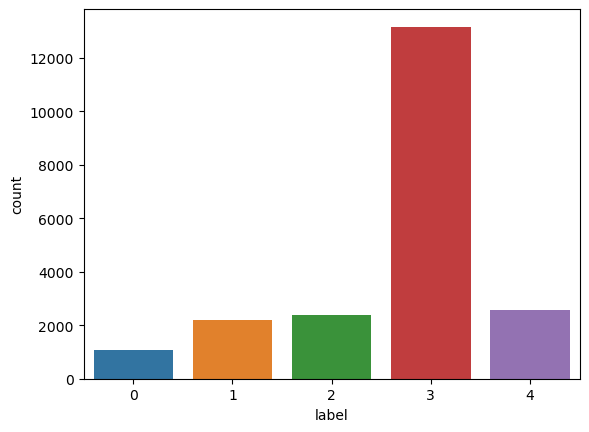

In [6]:
sns.countplot(train_df , x = 'label')

In [7]:
train_df['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [8]:
np.round((train_df['label'].value_counts()/len(train_df['label']))*100, 2)

3    61.49
4    12.04
2    11.15
1    10.23
0     5.08
Name: label, dtype: float64

In [9]:
len(train_df)

21397

In [10]:
import json
with open('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/label_num_to_disease_map.json') as file:
    print(json.dumps(json.loads(file.read()), indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


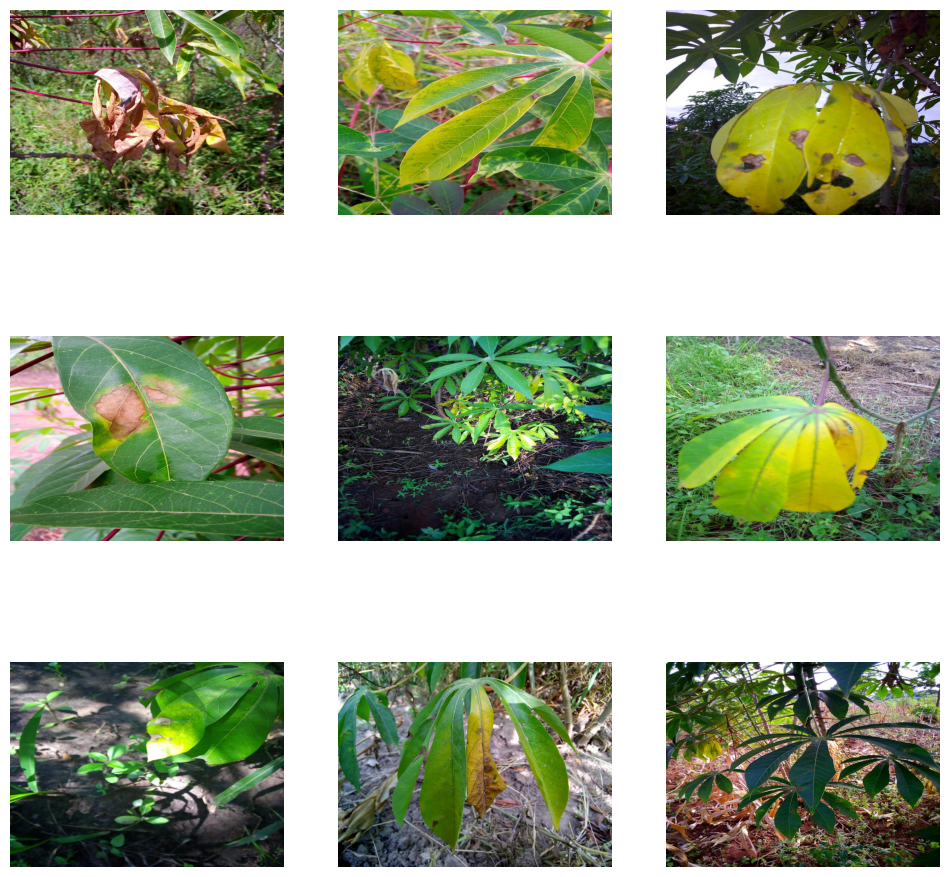

In [11]:
import cv2
sample = train_df[train_df.label == 0].sample(9)
plt.figure(figsize=(12,12))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3, 3, ind + 1)
    image = cv2.imread(os.path.join("C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    
plt.show()

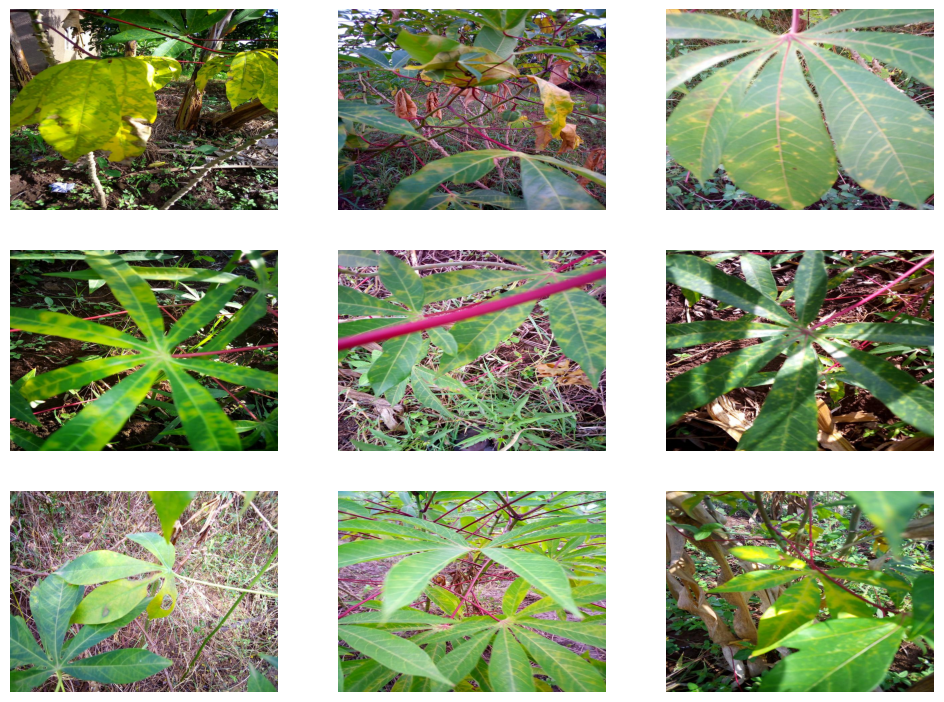

In [12]:
sample = train_df[train_df.label == 1].sample(9)
plt.figure(figsize=(12,12))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(4, 3, ind + 1)
    image = cv2.imread(os.path.join('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/train_images', image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    
plt.show()

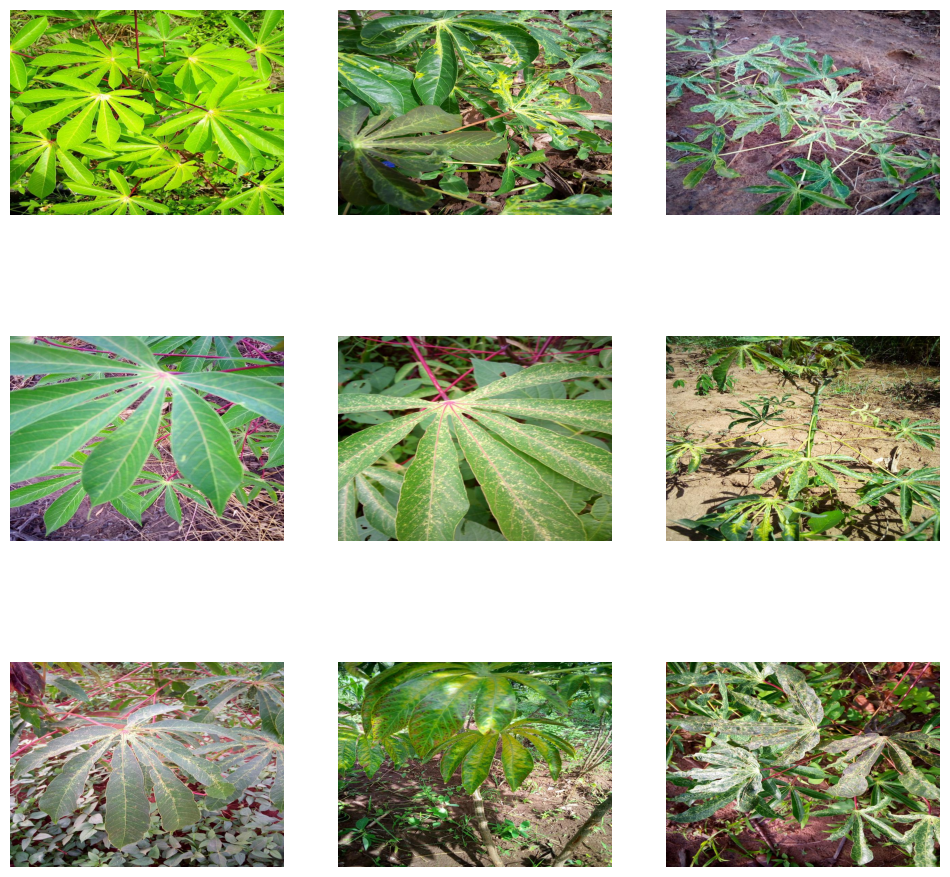

In [13]:
sample = train_df[train_df.label == 2].sample(9)
plt.figure(figsize=(12,12))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3, 3, ind + 1)
    image = cv2.imread(os.path.join('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/train_images', image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    
plt.show()

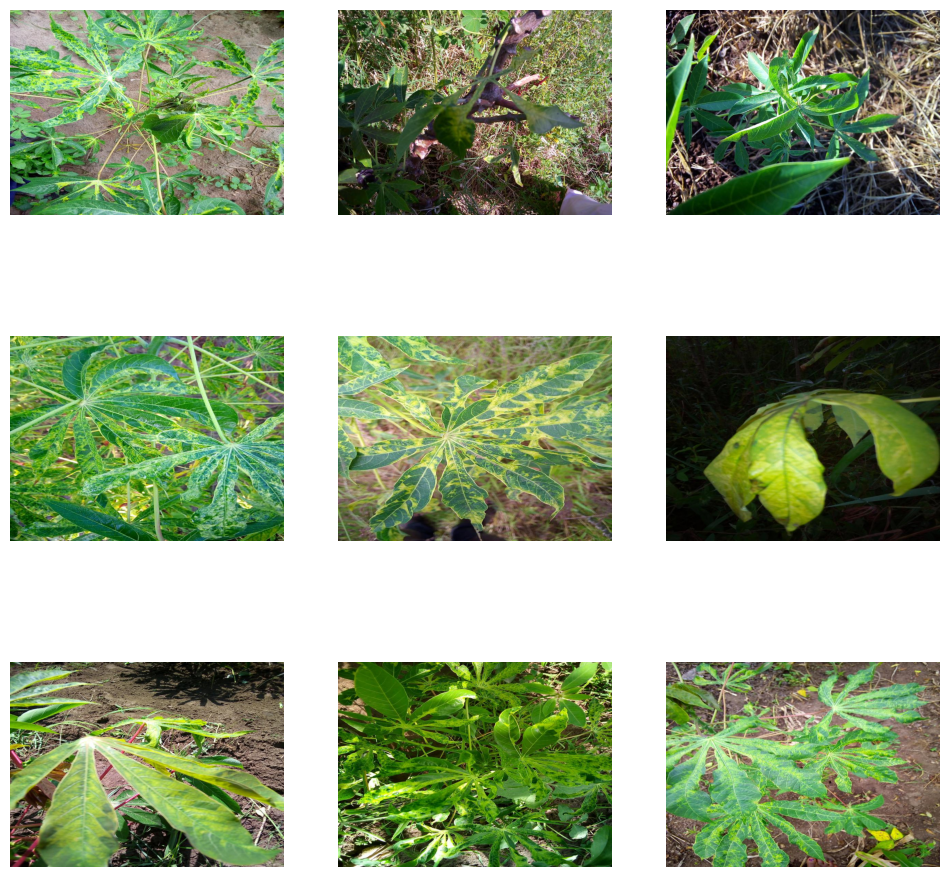

In [14]:
sample = train_df[train_df.label == 3].sample(9)
plt.figure(figsize=(12,12))
for ind, (img_id, lab) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3,3,ind+1)
    image = cv2.imread(os.path.join('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/train_images', img_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
plt.show()

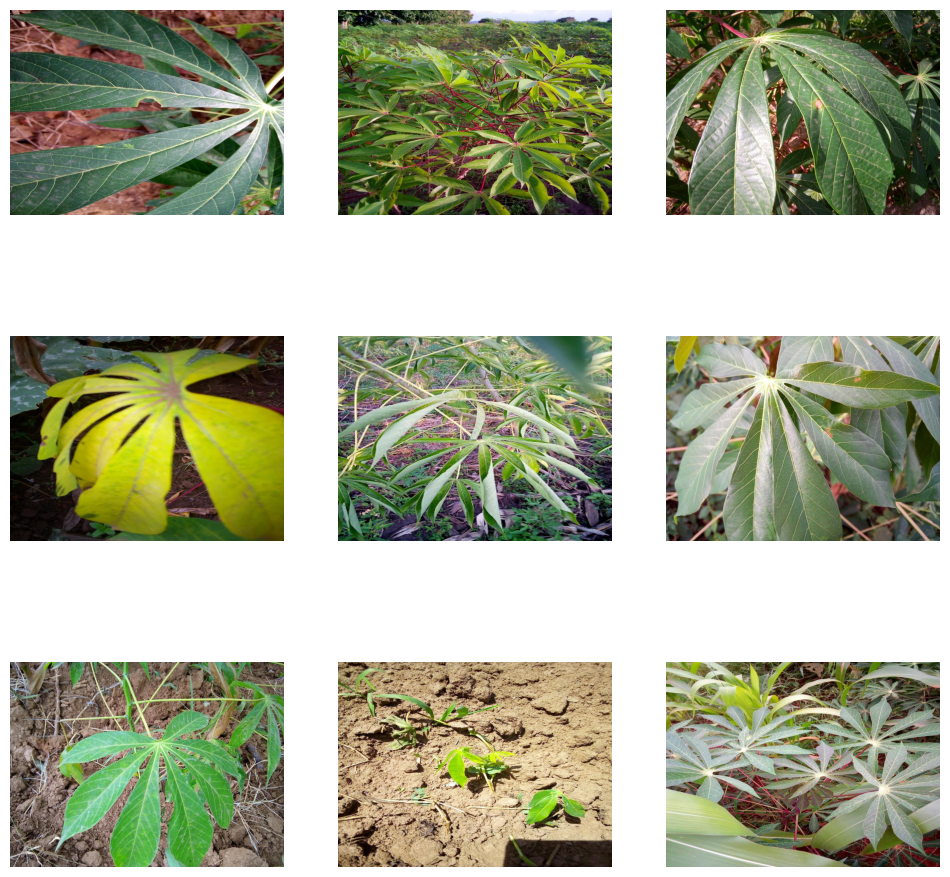

In [15]:
sample = train_df[train_df.label == 4].sample(9)
plt.figure(figsize=(12,12))
for ind, (img_id, lab) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(3,3,ind+1)
    image = cv2.imread(os.path.join('C:/Users/cvu103/Downloads/cassava-leaf-disease-classification/train_images', img_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [16]:
y_pred = [3] * len(train_df.label)
print("The baseline accuracy is {}".format(accuracy_score(y_pred, train_df.label)))

The baseline accuracy is 0.6149460204701593


In [17]:
Batch_size = 16
img_height, img_width = 300, 300

In [18]:
train_df['label'].dtype

dtype('int64')

In [19]:
train_df['label'] = train_df['label'].astype('str')
gen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2,
)

train_datagen = gen.flow_from_dataframe(
    train_df,
    directory = os.path.join(Dir, "train_images"),
    batch_size = Batch_size,
    target_size = (img_height, img_width),
    subset = "training",
    seed = 42,
    x_col = "image_id",
    y_col = "label",
    class_mode = "categorical"
)

Found 17118 validated image filenames belonging to 5 classes.


In [20]:
val_gen = ImageDataGenerator(
    validation_split = 0.2
)

val_datagen = val_gen.flow_from_dataframe(
    train_df,
    directory = os.path.join(Dir, "train_images"),
    batch_size = Batch_size,
    target_size = (img_height, img_width),
    subset = "validation",
    seed = 42,
    x_col = "image_id",
    y_col = "label",
    class_mode = "categorical"
)

Found 4279 validated image filenames belonging to 5 classes.


In [21]:
len(train_datagen), len(val_datagen)

(1070, 268)

In [22]:
img, label = next(train_datagen)

In [23]:
label

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [24]:
Steps_per_train = float(train_datagen.n) / train_datagen.batch_size
Steps_per_val = float(val_datagen.n) / val_datagen.batch_size

In [25]:
Steps_per_train, Steps_per_val

(1069.875, 267.4375)

In [26]:
def create_model():
    model = models.Sequential()
    model.add(EfficientNetB3(include_top=False, weights='imagenet',
                             input_shape=(img_height, img_width, 3), drop_connect_rate=0.3))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(5, activation='softmax'))
    
    loss = tf.keras.losses.CategoricalCrossentropy(
        label_smoothing=0.0001,
        name='categorical_crossentropy'
    )
    optimizer = optimizers.Adam(learning_rate=1e-4)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["categorical_accuracy"])
    return model

model = create_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 10, 10, 1536)      10783535  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [27]:
# Build the model
model.build((None))

# Plot the model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                            factor=0.2,
                                            mode = "min",
                                            min_lr=1e-6,
                                            patience=2, 
                                            verbose=1)

estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                       mode= "min",
                                       patience=3, 
                                       verbose=1,
                                       restore_best_weights=True)

history = model.fit(
    train_datagen,
    steps_per_epoch=int(Steps_per_train),
    epochs=5,
    verbose =1,
    validation_data=val_datagen,
    validation_steps=int(Steps_per_val),
    callbacks=[rlronp, estop]
)

Epoch 1/5


1069/1069 [==============================] - 4309s 4s/step - loss: 0.6358 - categorical_accuracy: 0.7733 - val_loss: 0.4743 - val_categorical_accuracy: 0.8357 - lr: 1.0000e-04
Epoch 2/5
1069/1069 [==============================] - 4349s 4s/step - loss: 0.4457 - categorical_accuracy: 0.8448 - val_loss: 0.4754 - val_categorical_accuracy: 0.8354 - lr: 1.0000e-04
Epoch 3/5
1069/1069 [==============================] - 4313s 4s/step - loss: 0.3758 - categorical_accuracy: 0.8691 - val_loss: 0.4556 - val_categorical_accuracy: 0.8483 - lr: 1.0000e-04
Epoch 4/5
1069/1069 [==============================] - 4282s 4s/step - loss: 0.3281 - categorical_accuracy: 0.8853 - val_loss: 0.4502 - val_categorical_accuracy: 0.8535 - lr: 1.0000e-04
Epoch 5/5
1069/1069 [==============================] - 4336s 4s/step - loss: 0.2781 - categorical_accuracy: 0.9049 - val_loss: 0.4688 - val_categorical_accuracy: 0.8509 - lr: 1.0000e-04


In [29]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])

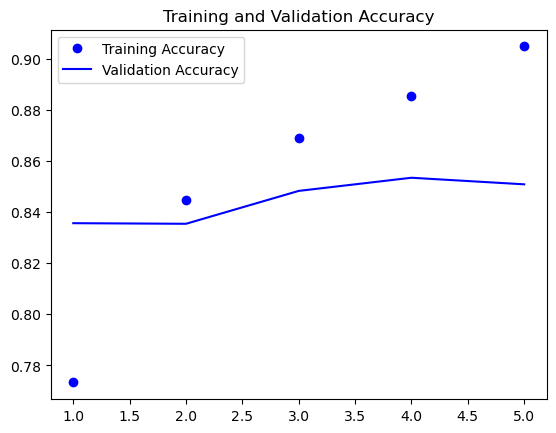

In [30]:
train_acc = history.history["categorical_accuracy"]
val_acc = history.history["val_categorical_accuracy"]
epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

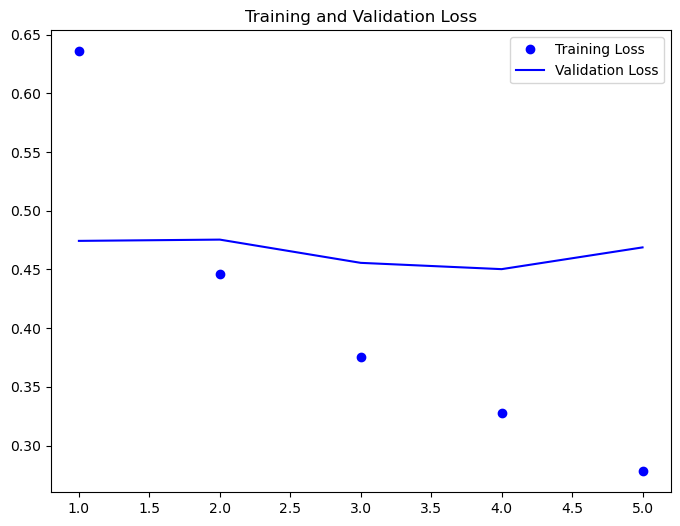

In [31]:
plt.figure(figsize=(8,6))
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()